**PIYUSH CHAUHAN B.TECH CSE 3RD YEAR**

# Objective: To implement the Expectation-Maximization (EM) algorithm and K-Means clustering for a dataset stored in a .CSV file, you can use Python with libraries like pandas for data manipulation, sklearn for machine learning, and matplotlib for visualization. Below is a step-by-step breakdown of how to apply both clustering algorithms and compare their results.

**Import Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score

**Load the Dataset**

In [2]:
# Load dataset
data = pd.read_csv('/kaggle/input/irisflowerdataset/IRIS.csv')

# Display the first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


**Data Preprocessing**

In [3]:
# Separate features (numeric columns) and target (categorical column)
features = data.iloc[:, :-1]  # All columns except the last one
target = data['species']  # Last column

# Check for missing values and fill if any
features = features.fillna(features.mean())

# Standardize the features for better clustering performance
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

**Apply K-Means Clustering**

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


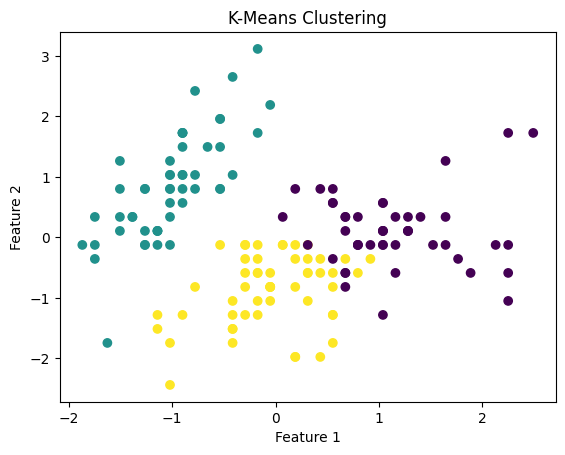

In [4]:
# Define the number of clusters
k = 3  # We know the Iris dataset has 3 species

# Initialize and fit K-Means
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_features)
kmeans_labels = kmeans.labels_

# Visualize K-Means clusters
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

**Apply Expectation-Maximization (EM) Algorithm**

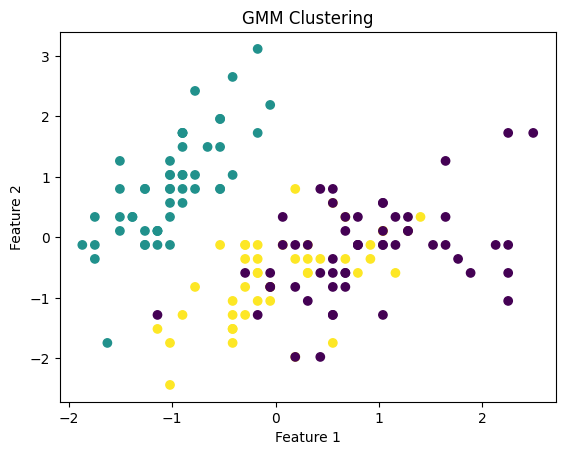

In [5]:
# Initialize and fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=k, random_state=42)
gmm.fit(scaled_features)
gmm_labels = gmm.predict(scaled_features)

# Visualize GMM clusters
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=gmm_labels, cmap='viridis')
plt.title('GMM Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

**Evaluate the Quality of Clustering**

In [6]:
# Map species names to numerical labels for evaluation
true_labels = target.map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

# Compute ARI scores
kmeans_ari = adjusted_rand_score(true_labels, kmeans_labels)
gmm_ari = adjusted_rand_score(true_labels, gmm_labels)

print(f"Adjusted Rand Index for K-Means: {kmeans_ari}")
print(f"Adjusted Rand Index for GMM: {gmm_ari}")

Adjusted Rand Index for K-Means: 0.6201351808870379
Adjusted Rand Index for GMM: 0.9038742317748124
